Utilities

In [2]:
# Install required packages.
import os
import torch
# os.environ['TORCH'] = torch.__version__
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

Sample Training and Skoring  

In [ ]:
# import os 
# import torch

# import time

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# os.environ['OMP_NUM_THREADS'] = '1'
# os.environ['MKL_NUM_THREADS'] = '1'


# t = int(time.time())

# import multiprocessing as mp
# num_each_threads = 1
# torch.set_num_threads(num_each_threads)
# torch.set_num_interop_threads(num_each_threads)

# from BurstAdmaDatasetLoader import BurstAdmaDatasetLoader
# # from autonotebook import tqdm as notebook_tqdm

# loader = BurstAdmaDatasetLoader(num_edges=5, negative_edge=False, features_as_self_edge=True)

# dataset = loader.get_dataset(lags=1)

# from torch_geometric_temporal.signal import temporal_signal_split

# # device = torch.device('cuda')
# # dataset = dataset.to(device)
# train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.7)


# import graphs.recurrent.graphs_base as base
# # from graphs.recurrent.graphs_agcrn import  ModelOps
# # from graphs.recurrent.graphs_dcrnn import ModelOps
# # from graphs.recurrent.graphs_a3tcgn import ModelOps
# # from graphs.recurrent.graphs_dygrencoder import ModelOps
# # from graphs.recurrent.graphs_evolvegcn_h import ModelOps
# from graphs.recurrent.graphs_evolvegcn_h_improved import ModelOps
# # from graphs.recurrent.graphs_evolvegcn_o import ModelOps
# # from graphs.recurrent.graphs_gclstm import ModelOps
# # from graphs.recurrent.graphs_gconvgru import ModelOps
# # from graphs.recurrent.graphs_lrgcn import ModelOps
# # from graphs.recurrent.graphs_mpnnlstm import ModelOps
# # from graphs.recurrent.graphs_tgcn import ModelOps

# # base.SCORE_METHOD = "micro"
# ml_structure =ModelOps() 
# ml_structure.train(loader,train_dataset,3,plot_model=False, calc_perf=True)

# torch.save(ml_structure.model, f"./runs/tmp/saved_model_{t}")
# metrics = ml_structure.eval(test_dataset ,plot_model=False)
# # ml_structure.plot(["a"])
# # ml_structure.plot(["a1"])
# # ml_structure.plot(["c"])
# # ml_structure.plot(["f"])
# # ml_structure.plot(["p"])
# # ml_structure.plot(["r"])
# # ml_structure.plot(["m"])
# print(metrics)

In [ ]:

# metrics = ml_structure.eval(test_dataset ,plot_model=False)
# ml_structure.plot("a")
# ml_structure.plot(["a1"])
# ml_structure.plot(["c"])
# ml_structure.plot(["f"])
# ml_structure.plot(["p"])
# ml_structure.plot(["r"])
# ml_structure.plot(["m"])
# ml_structure.plot(["a","p","r","f"])
# ml_structure.plot(["a1","m"])


In [3]:
import os 
import torch


import graphs.recurrent.graphs_base as base
# from graphs.recurrent.graphs_agcrn import  ModelOps
# from graphs.recurrent.graphs_dcrnn import ModelOps
# from graphs.recurrent.graphs_a3tcgn import ModelOps
# from graphs.recurrent.graphs_dygrencoder import ModelOps
# from graphs.recurrent.graphs_evolvegcn_h import ModelOps
from graphs.recurrent.graphs_evolvegcn_h_improved import ModelOps
# from graphs.recurrent.graphs_evolvegcn_o import ModelOps
# from graphs.recurrent.graphs_gclstm import ModelOps
# from graphs.recurrent.graphs_gconvgru import ModelOps
# from graphs.recurrent.graphs_lrgcn import ModelOps
# from graphs.recurrent.graphs_mpnnlstm import ModelOps
# from graphs.recurrent.graphs_tgcn import ModelOps
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'


import multiprocessing as mp
num_each_threads = 1
torch.set_num_threads(num_each_threads)
torch.set_num_interop_threads(num_each_threads)

from BurstAdmaDatasetLoader import BurstAdmaDatasetLoader
# from autonotebook import tqdm as notebook_tqdm

loader = BurstAdmaDatasetLoader(num_edges=5, negative_edge=False, features_as_self_edge=True)

dataset = loader.get_dataset(lags=1)

from torch_geometric_temporal.signal import temporal_signal_split

# device = torch.device('cuda')
# dataset = dataset.to(device)
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.7)


In [5]:


import graphs.recurrent.graphs_base as base
# from graphs.recurrent.graphs_agcrn import  ModelOps
# from graphs.recurrent.graphs_dcrnn import ModelOps
# from graphs.recurrent.graphs_a3tcgn import ModelOps
# from graphs.recurrent.graphs_dygrencoder import ModelOps
# from graphs.recurrent.graphs_evolvegcn_h import ModelOps
from graphs.recurrent.graphs_evolvegcn_h_improved import ModelOps
ml_structure =ModelOps() 
ml_structure.train(loader,train_dataset,3,plot_model=False, calc_perf=True)

all_metrics = []
for score_type in ["micro", "macro", "weighted"]: #,None (Per class perf), "samples", "binary"
    base.SCORE_METHOD = score_type
    print(f"Scoring with :{score_type}")
    metrics = ml_structure.eval(test_dataset ,plot_model=False)
    all_metrics.append({"score_type":score_type,"metrics":metrics});
print("\n".join(t["score_type"] + str(t["metrics"]) for t in all_metrics))

Scoring with :micro
Scoring with :macro
Scoring with :weighted
micro{'p': 0.015525114155251112, 'r': 0.015525114155251112, 'f': 0.015525114155251112, 'a': 0.015525114155251112, 'a1': 0.9856118721461208, 'm': -0.014729553061611167, 'c': 0.31600305438041687}
macro{'p': 0.5609876966951877, 'r': 0.41674813591407833, 'f': 0.012780427899814525, 'a': 0.015525114155251112, 'a1': 0.9856118721461208, 'm': -0.014729553061611167, 'c': 0.31600305438041687}
weighted{'p': 0.9012565601931768, 'r': 0.015525114155251112, 'f': 0.004207083358204, 'a': 0.015525114155251112, 'a1': 0.9856118721461208, 'm': -0.014729553061611167, 'c': 0.31600305438041687}


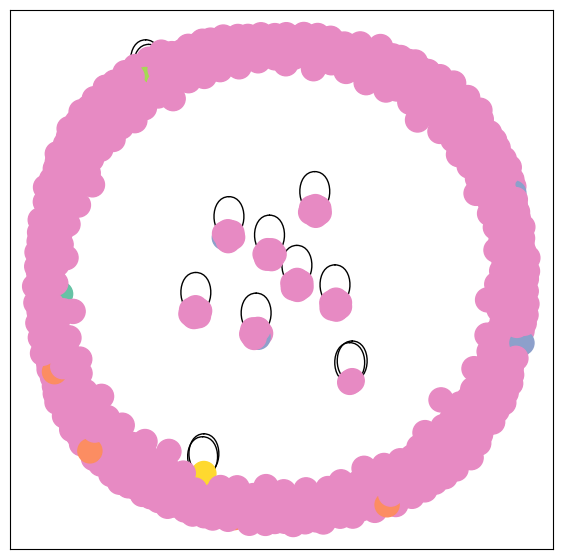

In [6]:
from torch_geometric.utils import to_networkx

G = to_networkx(test_dataset[0], to_undirected=True)
visualize_graph(G, color=test_dataset[0].y)

Embedding shape: [730, 2]


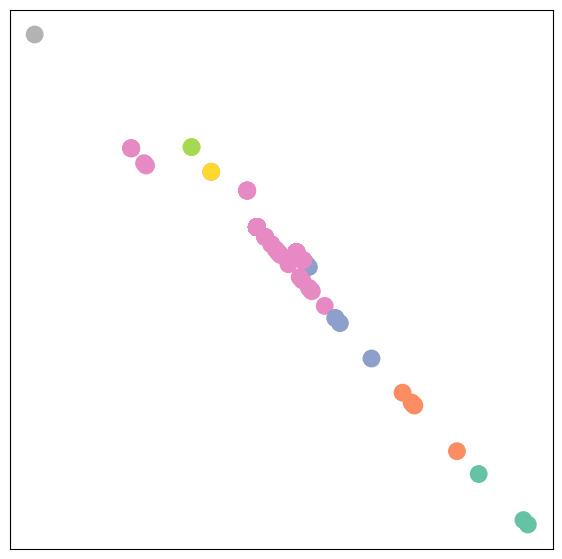

In [7]:
_, h = ml_structure.model(test_dataset[0].x, test_dataset[0].edge_index, test_dataset[0].edge_weight)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=test_dataset[0].y)

In [8]:
import os 
import torch
 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
# best model so far
ml_structure =ModelOps() 
#train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.7)
# ml_structure.model = torch.load("../split1/l_1-20_nt_1-19/models/saved_model_1681132533_0_20_0.7_20")
# ml_structure.model = torch.load("../split1/saved_model_1681142690_3_20_0.7_2")
## best model so far
# ml_structure.model = torch.load("../split1/saved_model_1681219225_1_4_0.7_11")
# ml_structure.model = torch.load("../split1/saved_model_1681219225_5_2_0.7_2")
# ml_structure.model = torch.load("../split1/lr_test_2/saved_model_1681301082_0.8_5_2_0.7_20")
ml_structure.model = torch.load("./model/saved_model_1681336502_0.007_5_1_0.7_4" )
base.SCORE_METHOD = "weighted"
#with torch.autograd.profiler.profile(use_cuda=False) as prof:
metrics = ml_structure.eval(test_dataset ,plot_model=True)

# ml_structure.plot()
print(metrics)
# ml_structure.save_model_visuals(f"../split1/torchviz_eval_{ml_structure.time}_saved_model_1681301082_0.8_5_2_0.7_20",\
#                                 "../split1/saved_model_1681301082_0.8_5_2_0.7_20",\
#                                     ml_structure.snapshot_eval())

{'p': 0.9992652342381068, 'r': 0.9991917808219154, 'f': 0.9988098234816963, 'a': 0.9991917808219154, 'a1': 0.9856118721461208, 'm': 0.9733516208479994, 'c': 0.16194957494735718}


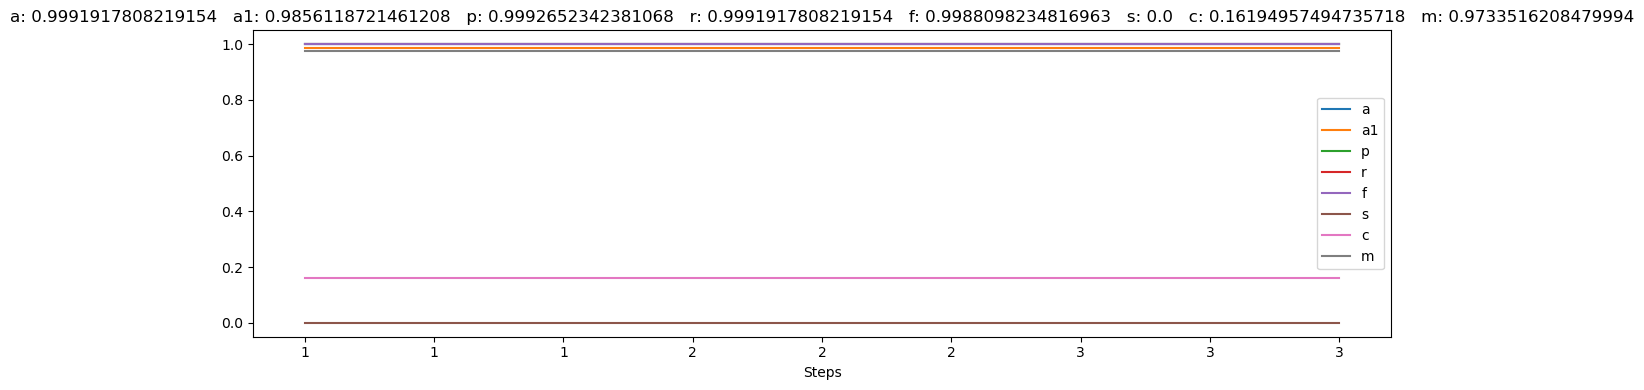

In [11]:
metrics = ml_structure.eval(test_dataset ,plot_model=True)
print(metrics)
ml_structure.plot()


In [ ]:
print(prof)


In [10]:
print([time for time, snapshot in enumerate(train_dataset)])
print([time for time, snapshot in enumerate(test_dataset)])
  
print(train_dataset.snapshot_count)
print(test_dataset.snapshot_count)
print(dir(train_dataset))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [12]:
for name, param in ml_structure.model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

recurrent.initial_weight tensor([[0.9650]])
recurrent.pooling_layer.weight tensor([[-0.4690]])
recurrent.recurrent_layer.weight_ih_l0 tensor([[-0.2772],
        [-0.4308],
        [-0.5655]])
recurrent.recurrent_layer.weight_hh_l0 tensor([[0.7705],
        [0.7524],
        [0.2315]])
recurrent.recurrent_layer.bias_ih_l0 tensor([ 0.8044,  1.0106, -0.8431])
recurrent.recurrent_layer.bias_hh_l0 tensor([0.0952, 0.5716, 0.5711])
conv1.bias tensor([-0.0279, -0.0280,  0.0278, -0.0267])
conv1.lin.weight tensor([[-0.0609],
        [-0.7679],
        [ 0.3078],
        [ 1.1063]])
conv2.bias tensor([ 0.0279,  0.0279, -0.0279,  0.0279])
conv2.lin.weight tensor([[-0.5359,  0.2971, -0.1168,  0.4254],
        [-0.3468,  0.4715, -0.3143,  0.7906],
        [ 0.7850,  0.4962,  0.1930,  0.1722],
        [-0.5749, -0.5682,  0.7846, -0.5234]])
conv3.bias tensor([-0.0279,  0.0262])
conv3.lin.weight tensor([[-0.1026, -0.2881,  0.7525, -0.3967],
        [ 0.6823, -0.3768,  0.7523, -0.0906]])
linear.weight t

In [13]:
for name, param in ml_structure.model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

recurrent.initial_weight tensor([[0.9650]])
recurrent.pooling_layer.weight tensor([[-0.4690]])
recurrent.recurrent_layer.weight_ih_l0 tensor([[-0.2772],
        [-0.4308],
        [-0.5655]])
recurrent.recurrent_layer.weight_hh_l0 tensor([[0.7705],
        [0.7524],
        [0.2315]])
recurrent.recurrent_layer.bias_ih_l0 tensor([ 0.8044,  1.0106, -0.8431])
recurrent.recurrent_layer.bias_hh_l0 tensor([0.0952, 0.5716, 0.5711])
conv1.bias tensor([-0.0279, -0.0280,  0.0278, -0.0267])
conv1.lin.weight tensor([[-0.0609],
        [-0.7679],
        [ 0.3078],
        [ 1.1063]])
conv2.bias tensor([ 0.0279,  0.0279, -0.0279,  0.0279])
conv2.lin.weight tensor([[-0.5359,  0.2971, -0.1168,  0.4254],
        [-0.3468,  0.4715, -0.3143,  0.7906],
        [ 0.7850,  0.4962,  0.1930,  0.1722],
        [-0.5749, -0.5682,  0.7846, -0.5234]])
conv3.bias tensor([-0.0279,  0.0262])
conv3.lin.weight tensor([[-0.1026, -0.2881,  0.7525, -0.3967],
        [ 0.6823, -0.3768,  0.7523, -0.0906]])
linear.weight t

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
         Dropout2d-3             [-1, 20, 8, 8]               0
            Linear-4                   [-1, 50]          16,050
            Linear-5                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


In [17]:

for name, param in ml_structure.model.state_dict().items():
    print(name, param.size())

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(ml_structure.model)

recurrent.initial_weight torch.Size([1, 1])
recurrent.pooling_layer.weight torch.Size([1, 1])
recurrent.recurrent_layer.weight_ih_l0 torch.Size([3, 1])
recurrent.recurrent_layer.weight_hh_l0 torch.Size([3, 1])
recurrent.recurrent_layer.bias_ih_l0 torch.Size([3])
recurrent.recurrent_layer.bias_hh_l0 torch.Size([3])
conv1.bias torch.Size([4])
conv1.lin.weight torch.Size([4, 1])
conv2.bias torch.Size([4])
conv2.lin.weight torch.Size([4, 4])
conv3.bias torch.Size([2])
conv3.lin.weight torch.Size([2, 4])
linear.weight torch.Size([1, 2])
linear.bias torch.Size([1])


55

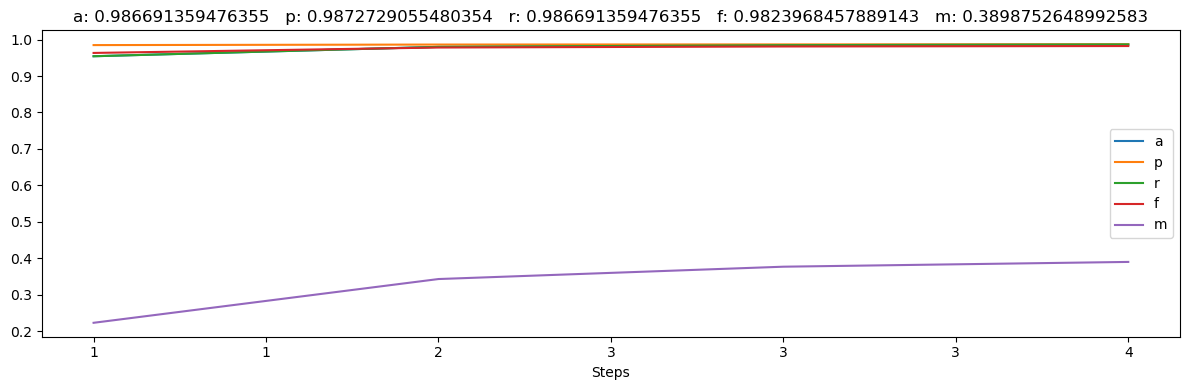

In [18]:
import os
import time
import random
import numpy as np
import hiddenlayer as hl

history1 = hl.History()
# best so far
# history1.load("../split1/saved_log_1681219225_1_4_0.7_11.pkl")
# history1.load("../split1/saved_log_1681301082_0.8_5_2_0.7_20.pkl")
history1.load("./model/saved_log_1681336502_0.007_5_1_0.7_4.pkl")


# A Canvas object to draw the metrics
canvas1 = hl.Canvas() 

def plot(fields=[]):
        # Plot the two metrics in one graph
        arr=[]
        if fields:
            for field in fields:
                arr.append(history1[field])
        else:
            arr = [history1["a"], history1["a1"], history1["p"], history1["r"], history1["f"], \
                                history1["s"], history1["c"], history1["m"]]
        canvas1.draw_plot(arr)


plot(["a","p","r","f","m"]) #"a","a1","p","f","r"

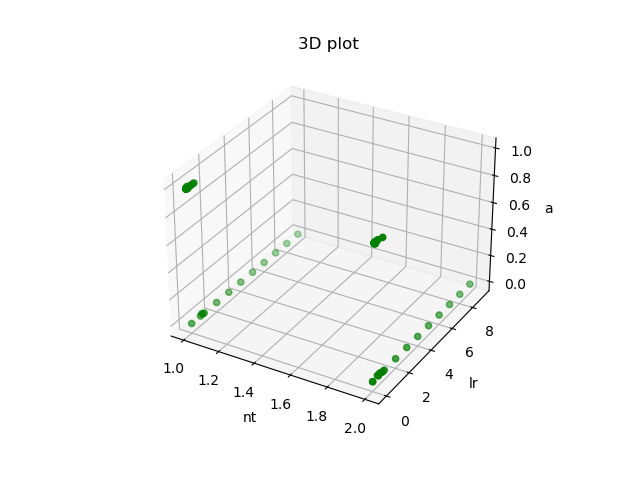

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas
from mpl_toolkits.mplot3d import Axes3D 

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax = fig.add_subplot(projection='3d')

n = 100
# with open("../split1/eval_metrics_1681336502.csv", 'r') as csvfile:
with open("./runs/1699279278/eval_metrics_1699279278.csv", 'r') as csvfile:
    df = pandas.read_csv(csvfile)
    # print(df.head)
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    # for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = df["nt"]
    ys = df["lr"]
    zs = df["a"]
    ax.scatter(xs, ys, zs,color='green') # marker='o')
    # zs = df["a"]
    # ax.scatter(xs, ys, zs, marker='^')

    ax.set_title("3D plot")
    ax.set_xlabel('nt')
    ax.set_ylabel('lr')
    ax.set_zlabel('a')

plt.show()